# Boundary value problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numbers

# Shooting & Quasi-linearization methods

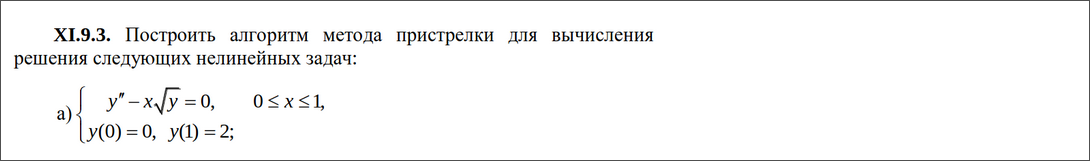

### Shooting method

Finite difference scheme:
$$\frac{y_{k+1} - 2y_k + y_{k-1}}{h^2} - kh\sqrt{y_k} = 0, \;\; k = 1, 2, 3, ..., N-1$$
$$y_1 = y_0 + \lambda_n\cdot h$$
$$y_0 = 0, \lambda_0 = \frac{ y(x_k) - y(0) }{ N \cdot h } = \frac{ 2 - 0 }{ N \cdot h }$$
$\lambda_n$ is refined by dividing the segment in half.

2.000817142359361


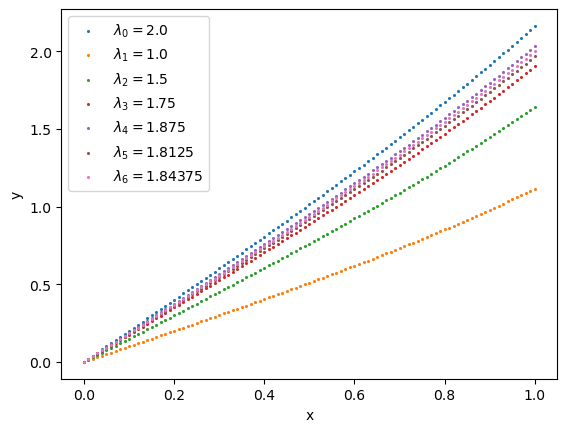

In [5]:
def drawPlot(x, y, l, n):
    plt.scatter(x, y, s = 1.5, label=f'$\lambda_{{{n}}} = {l}$')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

def solveDS(l, h, xk):
    N = int(xk / h)
    
    y = np.zeros(N + 1)
    x = np.zeros(N + 1)
    
    y[0] = 0
    y[1] = y[0] + l * h

    x[0] = 0 * h
    x[1] = 1 * h
    
    for k in range(1, N):
        y[k + 1] = np.sqrt(y[k]) * h * h * h * k + 2 * y[k] - y[k - 1]
        x[k + 1] = x[k] + h
    
    return x, y

# Draw the convergence of the shooting method.
def runShootingMethod(draw = True):
    left = 0
    right = 1
    xk = right - left
    h = 0.01

    # Lambda initial value
    l =  (2 - 0) / xk

    delta_max = 0.01
    n_max = 1000

    for n in range(n_max):
        x, y = solveDS(l, h, xk)
        if draw:
            drawPlot(x, y, l, n)
        # we expect y[-1] == 2
        delta = y[-1] - 2
        if abs(delta) < delta_max:
            break
        
        if delta < 0:
            left = l
        else:
            right = l

        l = (right + left) / 2

    return x, y, y[-1]

x, y, y_end = runShootingMethod()
print(y_end)

### Quasi-linearization method


Newton's linearization:
$$f(y^{m+1}) = f(y^{m}) + \frac{\partial f}{\partial y}(y^{m})\cdot(y^{m+1} - y^{m}),\;\; где \;\;f(y^m) = x\sqrt{y^m}$$
$$\frac{\partial f}{\partial y}(y^{m}) = \frac{x}{2\sqrt{y^m}}$$

Finite difference scheme:
$$\frac{y^{m+1}_{k+1} - 2y^{m+1}_k + y^{m+1}_{k-1}}{h^2} - x_k\sqrt{y^{m+1}_k} = 0, \;\; k = 1, 2, 3, ..., N-1$$

Combining equations together:
$$y^{m + 1}_0 = y(0) = 0$$

$$\frac{y^{m+1}_{k+1} - 2y^{m+1}_k + y^{m+1}_{k-1}}{h^2} - x_k\sqrt{y^{m}_k} - \frac{x_k}{2\sqrt{y^m_k}} \cdot(y^{m+1}_k - y^{m}_k) = 0, \;\; k = 1, 2, 3, ..., N-1$$

$$y^{m + 1}_N = y(1) = 2$$

Finite difference scheme:
$$\frac{ y_{k+1}^{m+1} - 2 y_k^{m+1} + y_{k-1}^{m+1} }{ h^2 } + \sin y_k^{m+1} = 0$$
$$f(y^m) = -\sin y^m, \frac{df}{dy}(y^m) = -\cos y^m$$

With Newton's linearization:
$$\frac{ y_{k+1}^{m+1} - 2 y_k^{m+1} + y_{k-1}^{m+1} }{ h^2 } + \sin y_k^{m} + \cos y_k^m \cdot (y_k^{m+1} - y_k^m) = 0$$
$$y_0^{m+1} = y(0) = 0, y_N^{m+1} = y(x_k) = \pi, x_k = 4 $$

2.0


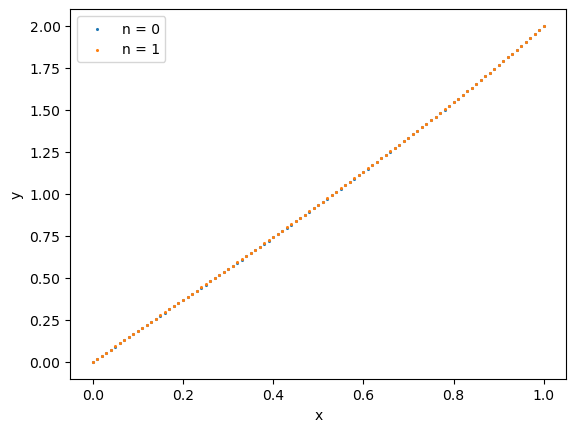

In [3]:
def drawPlot(x, y, n):
    plt.scatter(x, y, s = 1.5, label=f'n = {n}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

def solveQuasiLinear(y, h, xk):
    N = int(xk / h) + 1
    A = np.zeros((N, N))
    # A - matrix of coefficient for y^{m + 1}
    for i in range(N):
        for j in range(N):
            #left boundary
            if i == 0:
                if j == 0:
                    A[i][j] = 1
                else:
                    A[i][j] = 0
                continue
            # right boundary
            if i == (N - 1):
                if j == (N - 1):
                    A[i][j] = 1
                else:
                    A[i][j] = 0
                continue

            if i == j: # y{k} coefficient
                A[i][j] = -2/(h * h) - (i * h) / (2 * np.sqrt(y[i]))
            elif (i - 1) == j or (i + 1) == j: # y{k - 1} or y{k + 1}
                A[i][j] = 1/(h * h)
            else:
                A[i][j] = 0

    f = np.zeros(N)
    f[0] = 0 # left boundary
    f[N - 1] = 2 # right boundary
    for i in range(1, N - 2):
        f[i] = 1 / 2 * (i * h)  * np.sqrt(y[i])

    x = np.zeros(N)
    for i in range(N):
        x[i] = i * h
    
    return x, np.linalg.solve(A, f)

# Draw the convergence of the quasi-linear method.
def runQuasiLinearMethod(draw = True):
    xk = 1
    h = 0.01
    N = int(xk / h) + 1

    delta_max = 0.01
    n_max = 1000

    y_curr = np.zeros(N)
    y_prev = np.full(N, 1.5)
    
    for n in range(n_max):
        x, y_curr = solveQuasiLinear(y_prev, h, xk)
        if draw:
            drawPlot(x, y_curr, n)

        if np.max(np.abs(y_curr - y_prev)) < delta_max:
            break

        y_prev = y_curr

    return x, y_curr, y_curr[-1]

x, y, y_end = runQuasiLinearMethod()
print(y_end)


## Comparing methods

0.0008171423593608118

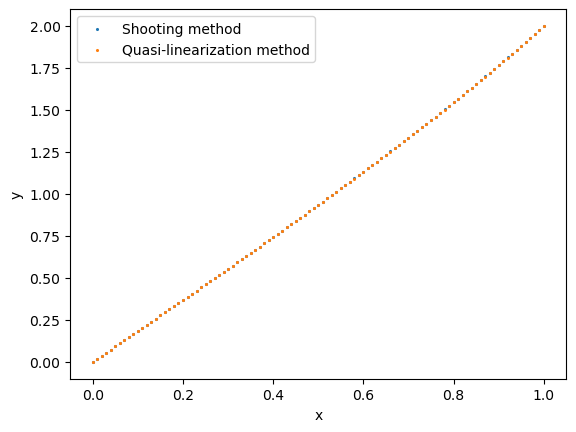

In [8]:
x_shoot, y_shoot, y_end_shoot = runShootingMethod(False)
x_quasi, y_quasi, y_end_quasi = runQuasiLinearMethod(False)

plt.scatter(x_shoot, y_shoot, s = 1.5, label='Shooting method')
plt.scatter(x_quasi, y_quasi, s = 1.5, label='Quasi-linearization method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

np.max(np.abs(y_shoot - y_quasi))

# Tridiagonal Method

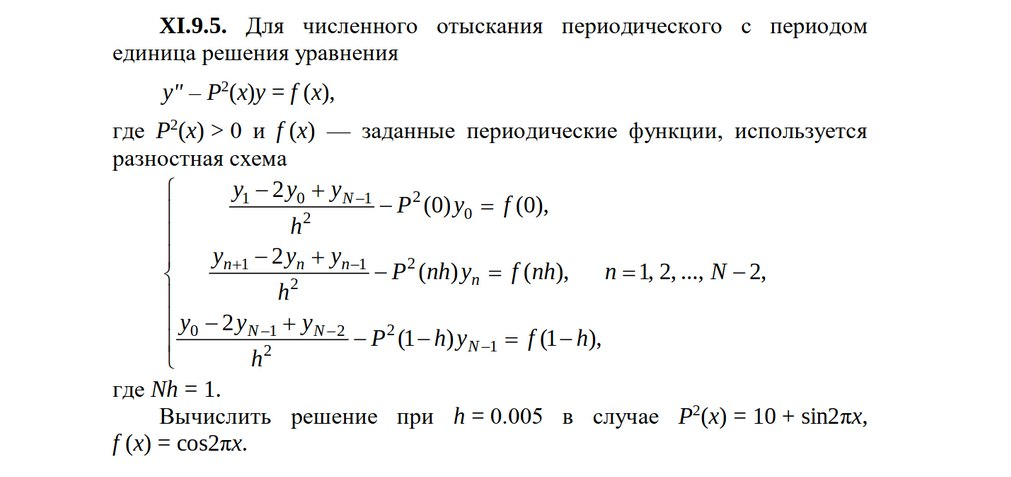

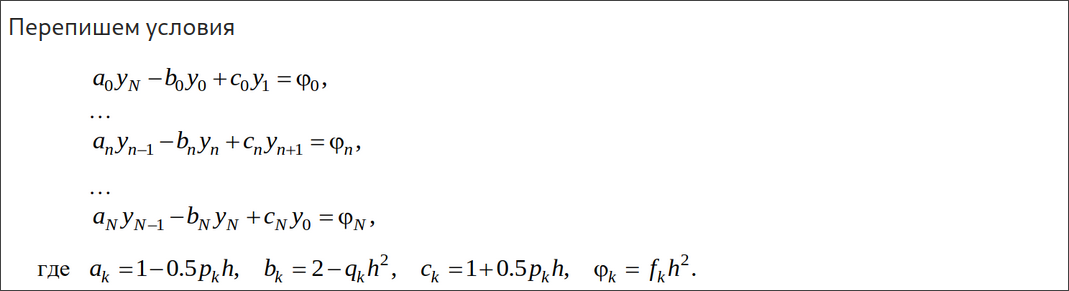

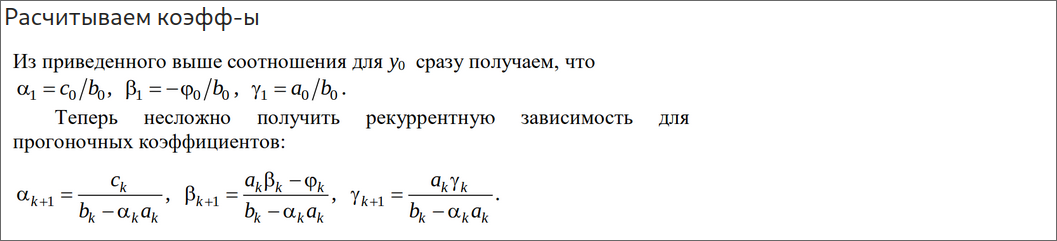

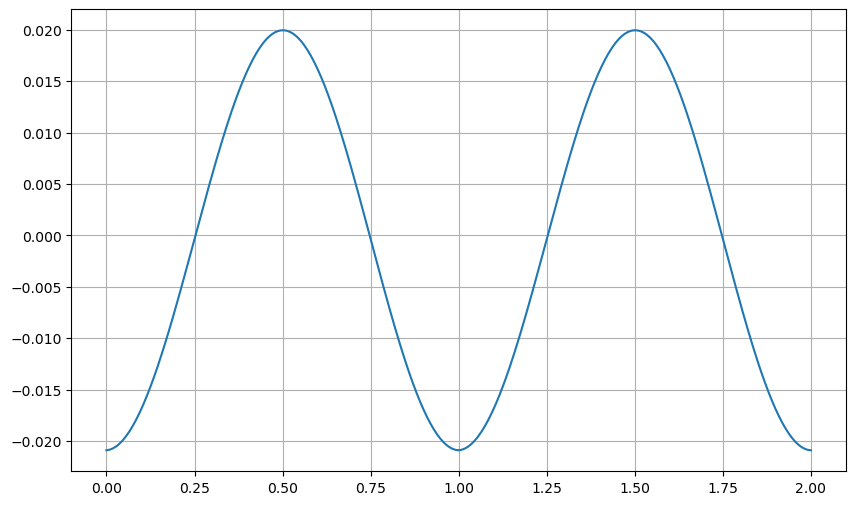

In [12]:
h = 0.005
p = lambda x: 0
q = lambda x: -(10 + np.sin(2*np.pi*x))
f = lambda x: np.cos(2*np.pi*x)

def solveTridiagonal(pk, qk, fk, h):
    N = len(fk)

    a = 1 - 1/2 * pk * h
    b = 2 - qk * h**2
    c = 1 + 1/2 * pk * h
    phi = fk * h**2

    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)

    alpha[1] = c[0]/b[0]
    beta[1] = -phi[0]/b[0]
    gamma[1] = a[0]/b[0]

    for k in range(1, N-1):
        alpha[k+1] = c[k]/(b[k] - alpha[k]*a[k])
        beta[k+1] = (a[k]*beta[k] - phi[k]) / (b[k] - alpha[k]/a[k])
        gamma[k+1] = a[k]*gamma[k] / (b[k] - alpha[k]*a[k])

    mu = np.ndarray(N)
    nu = np.ndarray(N)

    mu[N-1] = -c[N-1] / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])
    nu[N-1] = (phi[N-1] - a[N-1]*beta[N-1]) / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])

    for n in reversed(range(1, N)):
        mu[n-1] = alpha[n]*mu[n] + gamma[n]*mu[N-1]
        nu[n-1] = beta[n] + alpha[n]*nu[n] + gamma[n]*nu[N-1]

    y = np.ndarray(N)

    y[0] = nu[0] / (1 - mu[0])
    y[N-1] = mu[N-1]*y[0] + nu[N-1]

    for n in reversed(range(1, N)):
        y[n-1] = alpha[n]*y[n] + beta[n] + gamma[n]*y[N-1]

    return y

def runTridiagonal(p, q, f, h):
    T = 1.0
    N = int(T/h + 1)
    xk = np.array(np.linspace(0, 1, N))
    assert (xk[1] - xk[0]) <= h

    pk = np.array([p(x) for x in xk])
    qk = np.array([q(x) for x in xk])
    fk = np.array([f(x) for x in xk])

    yk = solveTridiagonal(pk, qk, fk, h)

    return xk, yk

x, y = runTridiagonal(p, q, f, 0.005)

# Continue the solution to check is function periodic?
n_periods = 2
y = np.tile(y, n_periods)
x = np.concatenate([x + i for i in range(0, n_periods)])

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.grid()

